In [124]:
import pandas as pd

covid_file = "Folkhalsomyndigheten_Covid19.xlsx"

veckodata_riket_df = pd.read_excel(covid_file, sheet_name = "Veckodata Riket")

In [125]:
veckodata_riket_df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [126]:
veckodata_riket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [127]:
veckodata_riket_df[veckodata_riket_df.isna().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [128]:
veckodata_riket_df[veckodata_riket_df.isnull().any(axis = 1)]

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv


In [129]:
# converting columns år and veckonummer with astype() before concatenating
veckodata_riket_df["Vecka"] = veckodata_riket_df["år"].astype(str) + "v" + veckodata_riket_df["veckonummer"].astype(str)

veckodata_riket_df["Vecka"].head()

0     2020v6
1     2020v7
2     2020v8
3     2020v9
4    2020v10
Name: Vecka, dtype: object

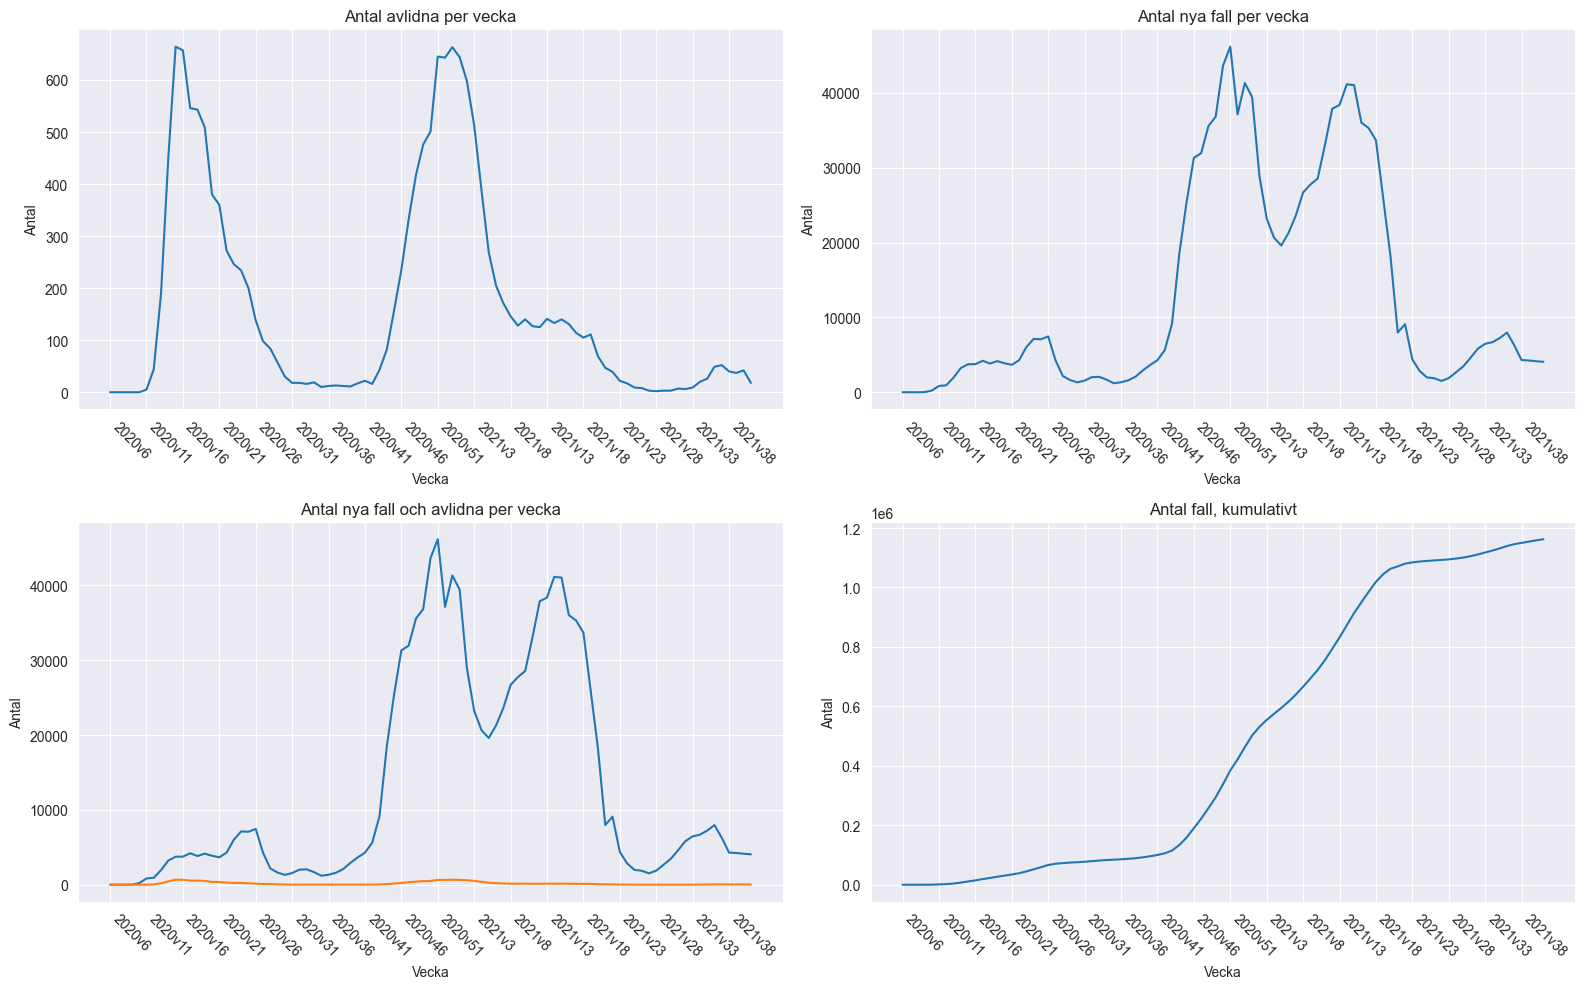

In [132]:
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

def sns_week_plotter(dataframe, plotlist):
    fig_sns, ax = plt.subplots(2, 2, figsize = (16, 10), dpi = 100)
    ax = ax.flatten()
    sns.set_style("darkgrid")

    for i, plot in enumerate(plotlist):
        for item in plot["x_columns"]:
            sns.lineplot(data = dataframe, x = "Vecka", y = item, ax = ax[i])
        ax[i].set(ylabel = plot["ylabel"], title = plot["title"], xticks = veckodata_riket_df["Vecka"][::5])
        ax[i].set_xticklabels(veckodata_riket_df["Vecka"][::5], rotation = -45, ha = "left")
    
    fig_sns.tight_layout()
    plt.savefig("./Visualiseringar/four_graphs.png", bbox_inches = "tight")


def px_week_plotter(dataframe, plotlist):
    for plot in plotlist:
        fig_px = px.line(
            dataframe, 
            x = "Vecka", 
            y = plot["x_columns"],
            labels = {"value": plot["ylabel"], "variable": "Variabel"},
            title = plot["title"]
        )

        fig_px.update_traces(mode = "lines", hovertemplate = None)
        fig_px.update_layout(hovermode = "x")

        filename = plot["title"].replace(",", "").replace(" ", "_").lower()
        fig_px.write_html(f"./Visualiseringar/{filename}.html")

to_plot = [{
        "title": "Antal avlidna per vecka",
        "x_columns": ["Antal_avlidna_vecka"],
        "ylabel": "Antal"
    },{
        "title": "Antal nya fall per vecka",
        "x_columns": ["Antal_fall_vecka"],
        "ylabel": "Antal"
    },{
        "title": "Antal nya fall och avlidna per vecka",
        "x_columns": ["Antal_fall_vecka", "Antal_avlidna_vecka"],
        "ylabel": "Antal"
    },{
        "title": "Antal fall, kumulativt",
        "x_columns": ["Kum_antal_fall"],
        "ylabel": "Antal"
}]

sns_week_plotter(veckodata_riket_df, to_plot)
px_week_plotter(veckodata_riket_df, to_plot)